<a href="https://colab.research.google.com/github/frios2020/Financial-Credit/blob/master/Project_1_Data_Mining_Summer_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 : Tutorial on AIF360
The AI Fairness is an open source toolkit for finding, understanding, and removing bias from a raw dataset. AIF360 was created to address fairness and bias in machine learning models. These toolkit is collection of many other contribution to bias detection and fairness. The power of this toolkit is that it assembles metrics of detecting bias, processes to mitigate it, and gives way to explain the results. 
<br>The AIF360 consists of four classes:</br>
<br>-Dataset class</br>
<br>-Metric class</br>
<br>-Explainer class</br>
<br>-Algorithm class</br>
<br>In the dataset class, this part is the same as machine learning pipline. Training data is used for learning and test data is used to predictions and make comparisons. With the toolkit, protected attributes are associated with each record in dataset.</br>
<br>Metric class is the class in which the group or individual fairnes metrics are computed for bias checking. Various bias dectecting methods can be implemeneted here such as Disparate impact, SPD, average odds difference, and ->equal opportunity difference.</br>
<br>To get more reading on what metrics class gives, the toolkit comes with the explainer class. It consist of two jobs reports explanations on accuracy metric, and fine grained localization for identifying the where the bias is.</br>
<br>Algorithm class is the class where AIF360 takes care of the bias and improve fairness. It consists of 3 steps:
</br>
<br>->Reweighing where weights are generated for training samples to ensure fairness. During preporcessing, optimizer learns a probabilitistic function that edits the freatures and labels in the data with group fairness, checking data fidelity, and individual misrepresentations. </br>
<br>->Adversial debiasing step that maximizes predictions while reduces the difficulties associated with determining protected attribute from predictions. The process leads to a fair classifier with no group discrimination that the adversary can use. Prejudice remover adds a discrimination-aware regularization term to the learning objective </br>
<br>->Equal odds post-processing step that solves a linear program to ﬁnd probabilities with which to change output labels to optimize equalized odds.  Calibrated equalized odds postprocessing optimizes over calibrated classiﬁer score outputs to ﬁnd probabilities with which to change output labels with an equalized odds objective.</br>
<br>AIF360 comes also with web interactive experience. The back end servive is such that the capabilities of the toolkit are turned into a web service into the cloud. This helps consumers for ease of use without even programming experience.</br>


# Question 2 Using Reweighing algorithm

## Installing Package

In [37]:
! pip install aif360

In [38]:
#Load data file just in case it is missing 
!wget -O ../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

--2020-06-13 21:51:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data’

../usr/local/lib/py 100%[===================>]  77.92K  --.-KB/s    in 0.06s   

2020-06-13 21:51:36 (1.31 MB/s) - ‘../usr/local/lib/python3.6/dist-packages/aif360/data/raw/german/german.data’ saved [79793/79793]



## Importing Statements

In [0]:
import sys
#sys.path.insert(1, "../")  
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from aif360.datasets import BinaryLabelDataset
from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector
from aif360.algorithms.preprocessing.optim_preproc import OptimPreproc
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions import get_distortion_german
from aif360.algorithms.preprocessing.optim_preproc_helpers.opt_tools import OptTools
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
# Explainers
from aif360.explainers import MetricTextExplainer

## Loading dataset, and splitting train and test dataset

In [0]:
# This dataset also contains protected attribute for "sex" which we do not consider in this evaluation
# age >=25 is considered privileged
# ignore sex-related attributes
dataset_orig = GermanDataset(protected_attribute_names=['age'],privileged_classes=[lambda x: x >= 25],features_to_drop=['personal_status', 'sex'] )   
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]


## Train dataset

In [41]:
## Step 3 Computing fairness metric on original training dataset
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


In [0]:
# Step 4 Mitigating bias by transforming the original dataset
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

In [43]:
## Step 5 Computing fairness metric on transformed dataset
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


## Test dataset

In [44]:
## Step 3 Computing fairness metric on original training dataset
metric_orig_test = BinaryLabelDatasetMetric(dataset_orig_test,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.006313


In [0]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
dataset_transf_test = RW.fit_transform(dataset_orig_test)

In [46]:
## Step 5 Computing fairness metric on transformed dataset
metric_transf_test = BinaryLabelDatasetMetric(dataset_transf_test,unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_test.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000


# Question 3 Using Optimized preprocessing algorithm

In [0]:
# Loading dataset and splitting train and test dataset
dxx = load_preproc_data_german(['age'])
dxx_train, dxx_test = dxx.split([0.7], shuffle=True)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

### Train dataset

In [48]:
# Computing fairness metric on original training dataset
metric_orig_train = BinaryLabelDatasetMetric(dxx_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.116725


In [0]:
# This section demonstrates the use of Optimized pre-processing algorithm for bias mitigation
optim_options = {
            "distortion_fun": get_distortion_german,
            "epsilon": 0.05,
            "clist": [0.99, 1.99, 2.99],
            "dlist": [.1, 0.05, 0]
        }

In [50]:
OP = OptimPreproc(OptTools, optim_options,unprivileged_groups = unprivileged_groups,privileged_groups = privileged_groups)

/usr/local/lib/python3.6/dist-packages/aif360/algorithms/preprocessing/optim_preproc.py:68: UserWarning: Privileged and unprivileged groups specified will not be used. The protected attributes are directly specified in the data preprocessing function. The current implementation automatically adjusts for discrimination across all groups. This can be changed by changing the optimization code.
  warn("Privileged and unprivileged groups specified will not be "


In [51]:
OP = OP.fit(dxx_train)

Optimized Preprocessing: Objective converged to 0.000000


In [0]:
dataset_transf_train1 = OP.transform(dxx_train, transform_Y = True)
dataset_transf_train1 = dxx_train.align_datasets(dataset_transf_train1)

In [53]:
# Computing fairnes metric on transformed dataset
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train1, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())
print("Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)")

assert np.abs(metric_transf_train.mean_difference()) < np.abs(metric_orig_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.035811
Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)


### Test dataset

In [27]:
# Computing fairness metric on original training dataset
metric_orig_test = BinaryLabelDatasetMetric(dxx_test, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

#### Original test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.199417


In [36]:
OP = OptimPreproc(OptTools, optim_options,unprivileged_groups = unprivileged_groups,privileged_groups = privileged_groups)
OP = OP.fit(dxx_test)
dataset_transf_test1 = OP.transform(dxx_test, transform_Y = True)
dataset_transf_test1 = dxx_test.align_datasets(dataset_transf_test1)            

/usr/local/lib/python3.6/dist-packages/aif360/algorithms/preprocessing/optim_preproc.py:68: UserWarning: Privileged and unprivileged groups specified will not be used. The protected attributes are directly specified in the data preprocessing function. The current implementation automatically adjusts for discrimination across all groups. This can be changed by changing the optimization code.
  warn("Privileged and unprivileged groups specified will not be "


Optimized Preprocessing: Objective converged to 0.004215


In [28]:
# Computing fairnes metric on transformed dataset
metric_transf_test = BinaryLabelDatasetMetric(dataset_transf_test, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed test dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_test.mean_difference())
print("Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)")

assert np.abs(metric_transf_test.mean_difference()) < np.abs(metric_orig_test.mean_difference())

#### Transformed test dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.035811
Optimized preprocessing has reduced the disparity in favorable outcomes between the privileged and unprivileged groups (training data)


# Question 4 Comparing the Reweighting and Optimized Preprocessing Algorithms

At the Question 2 and 3 we used the metric "mean difference" from our original dataset to determine the fairness in the training dataset<br>
This difference in mean outcomes between unprivileged and privileged groups is -0.169905. It means that the train dataset is biased with some benefit for unprivileged group. On the same way in test dataset XXXXXXXXXXXXXXXXXXXXXXXX<br>
Additionality, after we applied the mitigation algorithm Reweighting and Optimized Preprocessing in train dataset, we found that both reach to mitigate correctly, this dataset transformed has bias 0.


# Extra

## Training unbiased models using Logistic Regression


In [56]:
def training(dataset_transf_train,dataset_transf_test,type_mitigation):
  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(dataset_transf_train.features)
  X_test = scale_orig.fit_transform(dataset_transf_test.features)
  y_train = dataset_transf_train.labels.ravel()
  y_test = dataset_transf_test.labels.ravel()
  lr = LogisticRegression(C=100,random_state=1,solver='lbfgs')
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)
  print('Test Accuracy: %.3f' % accuracy_score(y_test,y_pred), type_mitigation)
  
training(dataset_transf_train,dataset_transf_test,"Reweighing Algorithm")
training(dataset_transf_train1,dataset_transf_test1,"Optimized preprocessing Algorithm")


Test Accuracy: 0.753 Reweighing Algorithm
Test Accuracy: 0.736 Optimized preprocessing Algorithm


## Analyzing train dataset without AIF360 package - Disparate Impact

In [57]:
def to_dataframes(aif360_ds):
  X = pd.DataFrame(aif360_ds.features, columns=aif360_ds.feature_names)
  y = pd.DataFrame(aif360_ds.labels.ravel(), columns=aif360_ds.label_names)
  Xy = pd.concat([X,y],axis=1)
  return Xy

train_XY = to_dataframes(dataset_orig_train)

privil = len(train_XY.loc[train_XY['age']==1])
unprivil = len(train_XY.loc[train_XY['age']==0])

privil_fav = len(train_XY.loc[(train_XY['age']==1) & (train_XY['credit']==1)])
unprivil_fav = len(train_XY.loc[(train_XY['age']==0) & (train_XY['credit']==1)])

privil_nofav = len(train_XY.loc[(train_XY['age']==1) & (train_XY['credit']==2)])
unprivil_nofav = len(train_XY.loc[(train_XY['age']==0) & (train_XY['credit']==2)])

ratio_unpriv_fav = unprivil_fav / unprivil
ratio_priv_fav = privil_fav / privil

ratio_disparate_impact=(ratio_unpriv_fav/ratio_priv_fav)*100

print("privileged: {'age': 1}",privil," unprivileged: {'age': 0}",unprivil)
print("privileged_favorable:",privil_fav," unprivileged_favorable:",unprivil_fav)
print("Ratio Unprivileged Favorable:",ratio_unpriv_fav)
print("Ratio Privileged Favorable:",ratio_priv_fav)
print("Disparate Impact:",ratio_disparate_impact)


privileged: {'age': 1} 587  unprivileged: {'age': 0} 113
privileged_favorable: 427  unprivileged_favorable: 63
Ratio Unprivileged Favorable: 0.5575221238938053
Ratio Privileged Favorable: 0.727427597955707
Disparate Impact: 76.64297113013201


## Data Visualization

### Understanding dataset biased

<Figure size 1440x288 with 0 Axes>

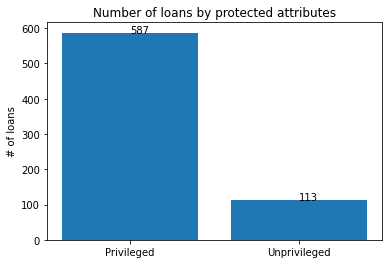

In [60]:

names = ['Privileged', 'Unprivileged']
values = [privil, unprivil]
plt.figure(figsize=(20, 4))
fig, ax =plt.subplots()
plt.bar(names, values)
plt.title('Number of loans by protected attributes')
ax.set_ylabel('# of loans')
for index, value in enumerate(values):
    plt.text(index, value, str(value))
plt.show()

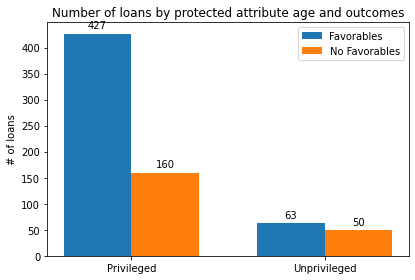

In [59]:
names = ['Privileged', 'Unprivileged']
favorables = [privil_fav, unprivil_fav]
nofavorables = [privil_nofav,unprivil_nofav]

x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, favorables, width, label='Favorables')
rects2 = ax.bar(x + width/2, nofavorables, width, label='No Favorables')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of loans')
ax.set_title('Number of loans by protected attribute age and outcomes')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
